<a href="https://colab.research.google.com/github/sahilvunnam/Heart-Disease-Predictor/blob/main/HeartDiseasePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e10cf11e63fc>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="thal", data=df, palette="bwr")


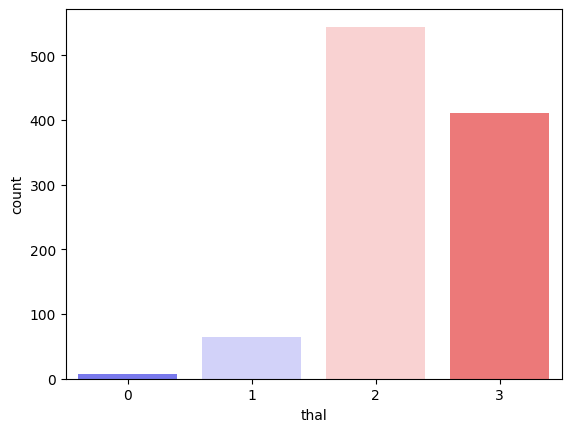

<ipython-input-1-e10cf11e63fc>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data = df, palette = "mako_r")


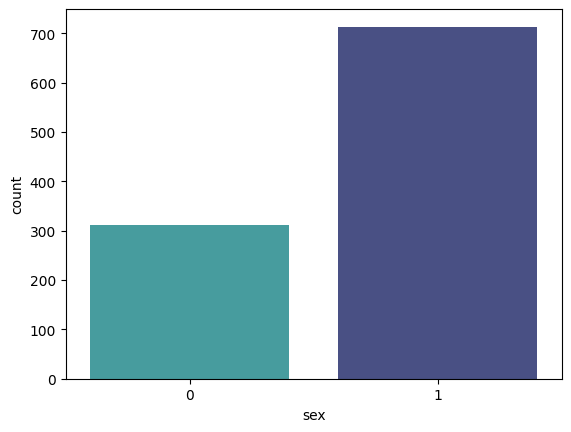

Percentage of people that have a slope of 2: 45.76%
Percentage of people that have a Fasting Blood Sugar <= 120: 85.07%
Percentage of people that have a Fasting Blood Sugar > 120: 14.93%


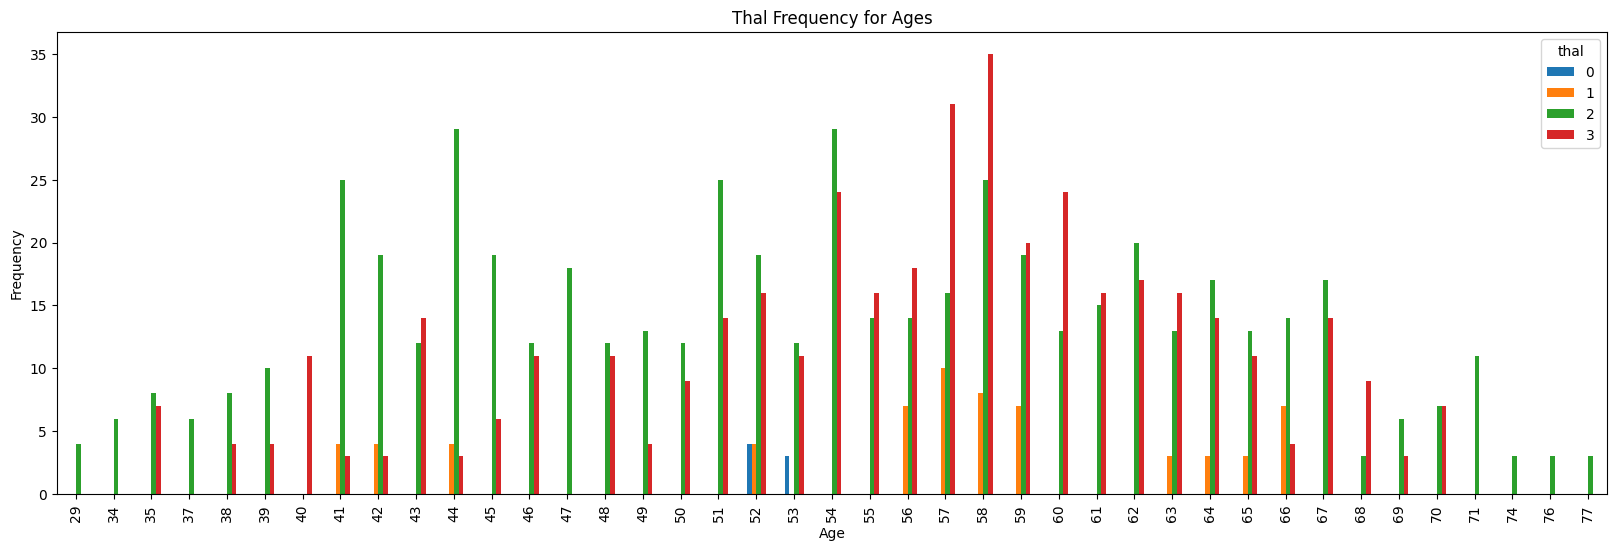

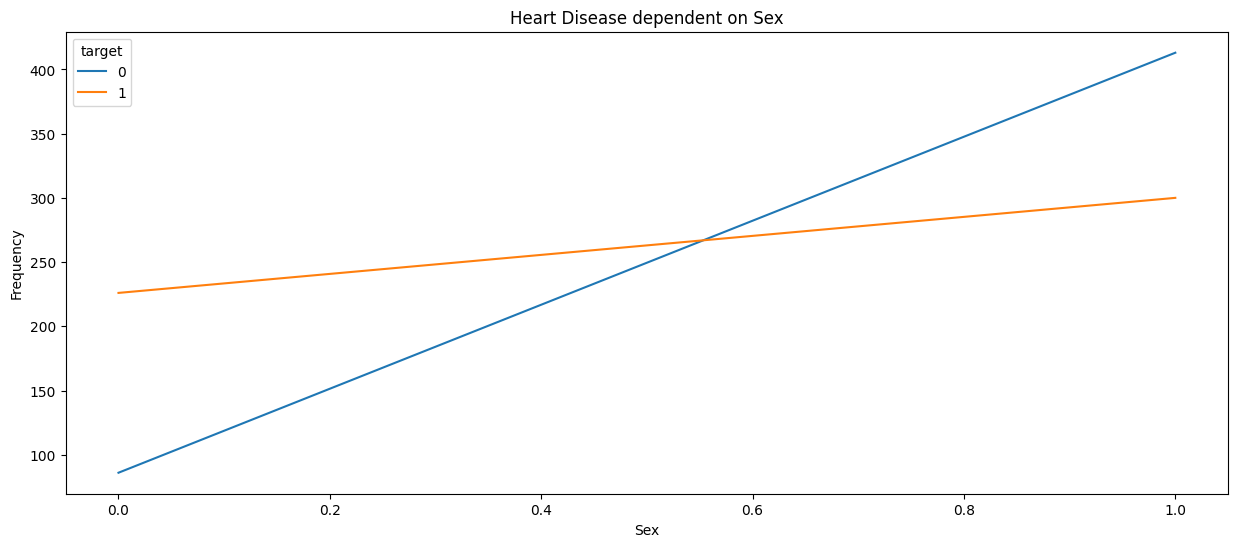

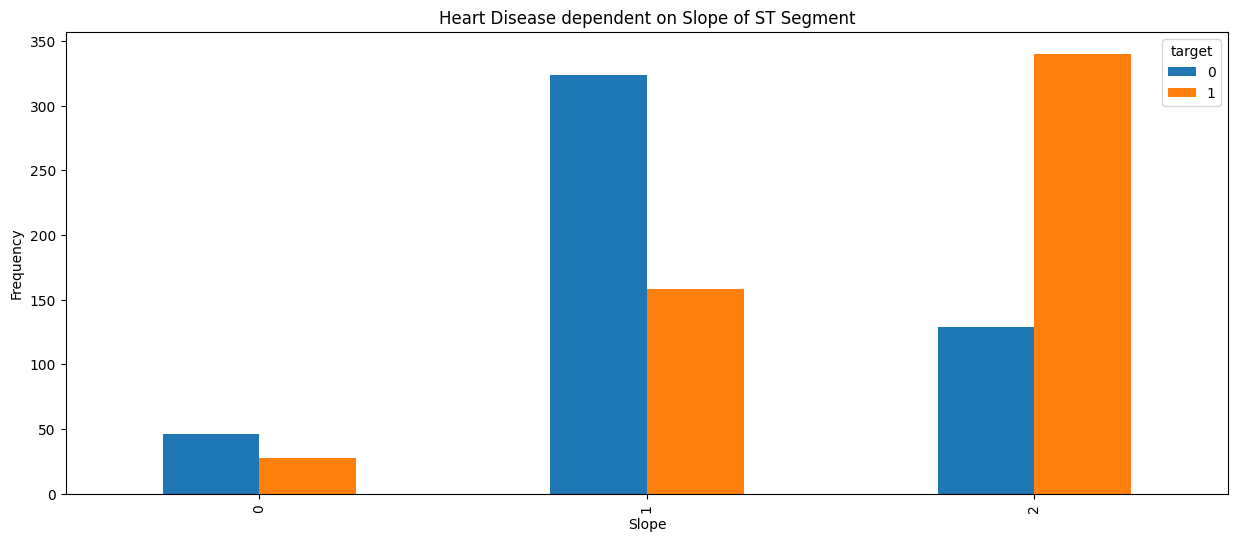

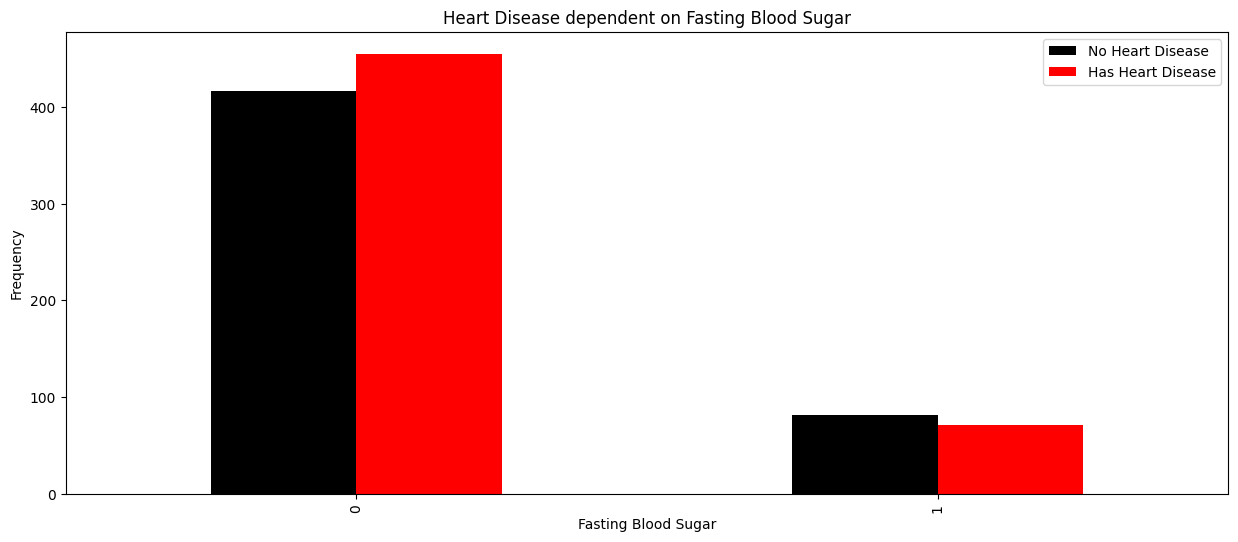

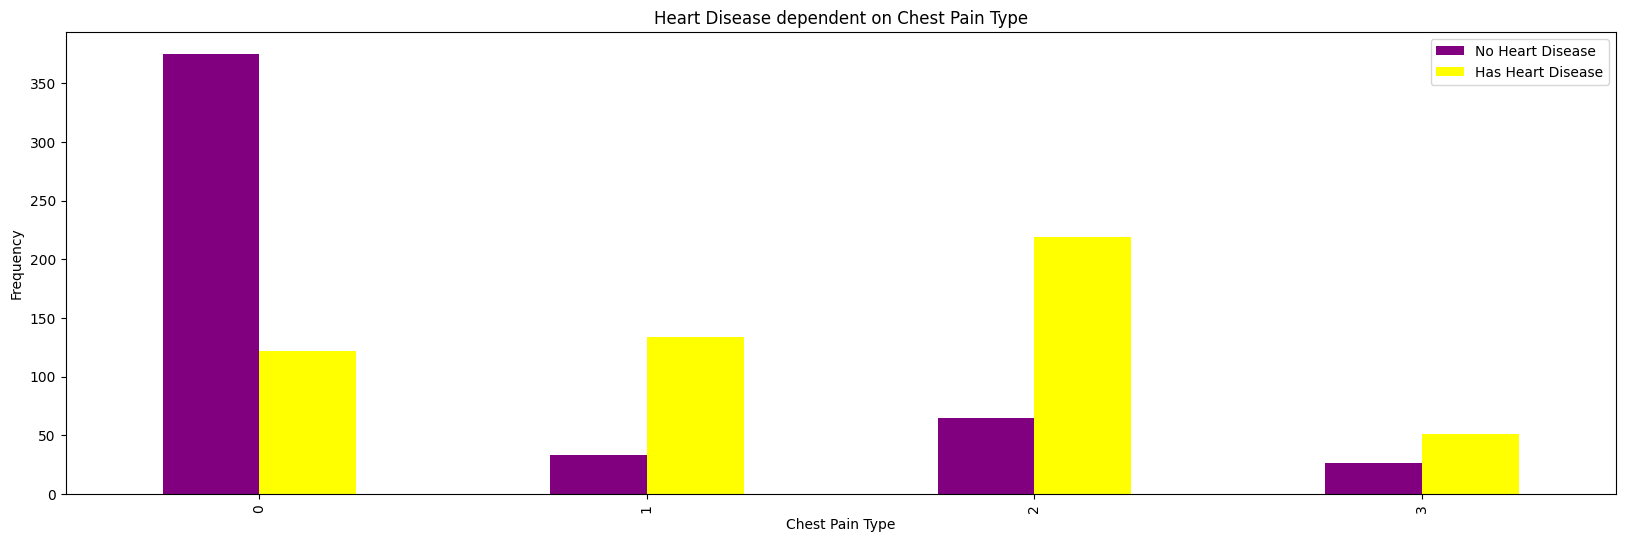

Iterations:  100
Costs: 0.45826602090200874


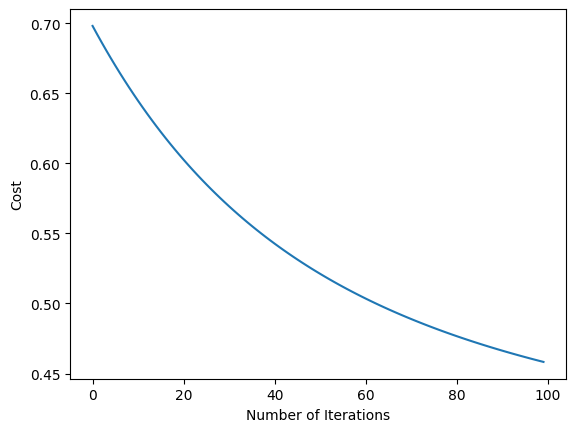

Manual Test Accuracy: 86.69%
Test Accuracy 72.40%
Decision Tree Accuracy: 100.00%
Random Forest Classifier Accuracy: 100.00%
KNN Model Accuracy: 93.18%


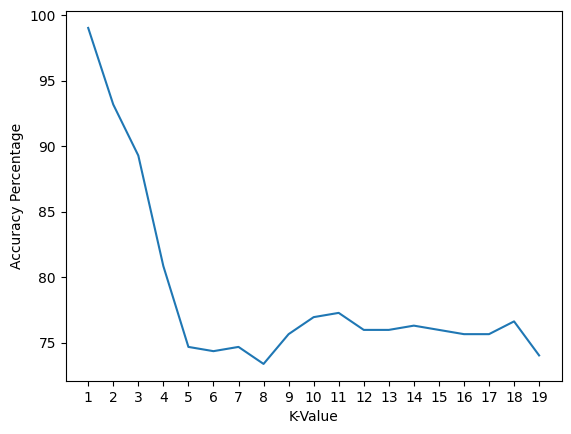

SVM Algorithm Accuracy: 75.00%
Naive Bayes Accuracy: 88.31%


<ipython-input-1-e10cf11e63fc>:300: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


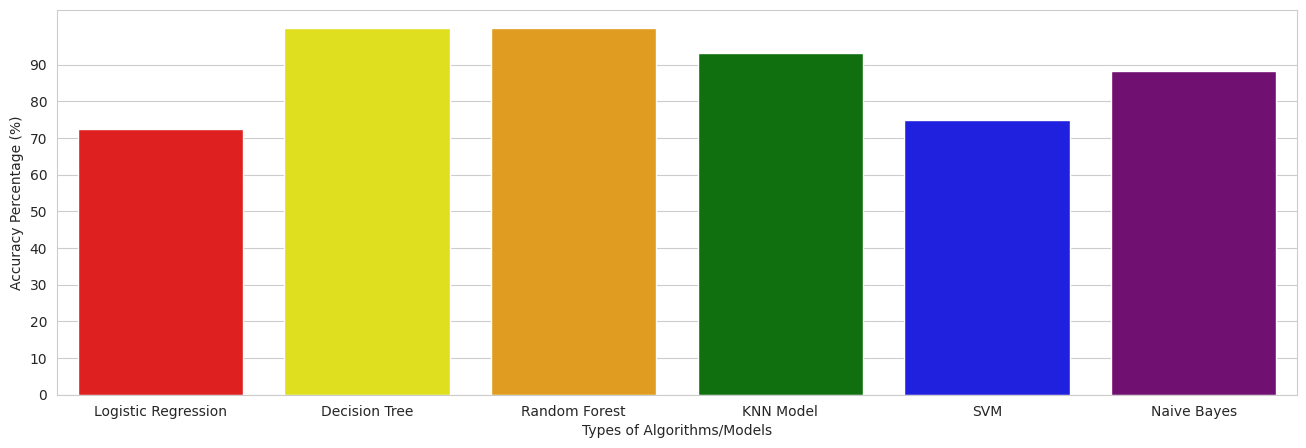

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4876 - loss: 0.7574 - val_accuracy: 0.5294 - val_loss: 0.6911
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5173 - loss: 0.7203 - val_accuracy: 0.5294 - val_loss: 0.6894
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6032 - loss: 0.6729 - val_accuracy: 0.5294 - val_loss: 0.6876
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5297 - loss: 0.6937 - val_accuracy: 0.5294 - val_loss: 0.6869
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6619 - loss: 0.6472 - val_accuracy: 0.5294 - val_loss: 0.6856
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6327 - loss: 0.6405 - val_accuracy: 0.5490 - val_loss: 0.6832
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6242 - loss: 0.6559 - val_accuracy: 0.5686 - val_loss: 0.6810
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5887 - loss: 0.6501 - val_accuracy: 0.5686 - 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Loads dataset into df
df = pd.read_csv("../lib/heart.csv")

df.head()
df.shape

df.sex.value_counts()

#Countplot displaying "Thal" - A number that represents an assessment of blood flow during exercise
sns.countplot(x="thal", data=df, palette="bwr")
plt.show()

#Countplot displaying the amount of males and females within a dataset
sns.countplot(x="sex", data = df, palette = "mako_r")
plt.show()

#Finds the amount of people within the dataset that have a slope of 2 (Downsloping slope of the peak)
count2slope = len(df[df.slope == 2])
print("Percentage of people that have a slope of 2: {:.2f}%".format((count2slope/(len(df.slope)) * 100)))

#Finds the amount of people that have a Fasting Blood Sugar <= 120
count0fbs = len(df[df.fbs == 0])
print("Percentage of people that have a Fasting Blood Sugar <= 120: {:.2f}%".format((count0fbs/(len(df.fbs)) * 100)))

#Finds the amount of people that have a Fasting Blood Sugar > 120
count1fbs = len(df[df.fbs == 1])
print("Percentage of people that have a Fasting Blood Sugar > 120: {:.2f}%".format((count1fbs/(len(df.fbs)) * 100)))

#Getting mean values of the each column within our dataset depending if a patient has heart disease or not
df.groupby('target').mean()


pd.crosstab(df.age, df.thal).plot(kind="bar", figsize=(20, 6))
plt.title("Thal Frequency for Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(df.sex, df.target).plot(kind="line", figsize=(15, 6))
plt.title("Heart Disease dependent on Sex")
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

#The Slope of the ST Segment is positively correlated to having heart disease
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15, 6))
plt.title("Heart Disease dependent on Slope of ST Segment")
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.show()

#Based on our graph we can say that Fasting Blood Sugar doesn't correlate negatively or positively to having Heart Disease
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(15, 6), color=('black', 'red'))
plt.title("Heart Disease dependent on Fasting Blood Sugar")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Has Heart Disease"])
plt.show()

#Based on our graph we can say that Chest Pain type is positively correlated to having Heart Disease
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(20, 6), color=('purple', 'yellow'))
plt.title("Heart Disease dependent on Chest Pain Type")
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.legend(["No Heart Disease", "Has Heart Disease"])
plt.show()

#Dummy Variables
a = pd.get_dummies(df['cp'], prefix ="cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

y = df.target.values
x_data = df.drop(['target'], axis = 1)

#Min-Max Normalization
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

#Split training and testing within our dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

#Fit our training and testing
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#Sigmoid Function - Converts any number to go between 0 and 1
#Equation - 1 / (1 + e^(-z))
def sigmoid(z):
  y_head = 1 / (1 + np.exp(-z))
  return y_head

#Forward and Backward Propagation Function
def forwardBackward(weight, bias, x_train, y_train, lambda_reg=0.01):

  #Forward aspect

  y_head = sigmoid(np.dot(weight.T, x_train) + bias)
  #The loss measures how well the predicted values are with the actual values
  loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
  #Calculates the total loss
  cost = np.sum(loss) / x_train.shape[1] + (lambda_reg / 2) * np.sum(weight ** 2)

  #Backward
  #This line computes the gradient of the loss with respect to the weights. It tells us how much the loss would change if we made small adjustments to the weights.
  derivative_weight = np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1] + lambda_reg * weight
  #This line computes the gradient of the loss with respect to the bias term.
  derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
  gradients = {"Derivative Weight": derivative_weight, "Derivative Bias": derivative_bias}

  return cost, gradients

#Prediction Function
def predict(weight, bias, x_test):
  z = np.dot(weight.T,x_test) + bias
  y_head = sigmoid(z)
  y_prediction = np.zeros((1, x_test.shape[1]))

  for i in range(y_head.shape[1]):
    if y_head[0, i] <= 0.5:
      y_prediction[0, i] = 0
    else:
      y_prediction[0, i] = 1

  return y_prediction

#Initializes weight and bias for our model
def initialize(dimension):
  weight = np.full((dimension, 1), 0.01)
  bias = 0.0
  return weight, bias

#Helps improve model performance and optimization process by standardizing features (all features have similar ranges)
#Allows our gradient descent algorithm to converge faster
def scale_features(x_train, x_test):
  scaler = StandardScaler()
  x_train_scaled = scaler.fit_transform(x_train.T).T
  x_test_scaled = scaler.transform(x_test.T).T
  return x_train_scaled, x_test_scaled

#Updates model weights and bias through gradient descent with regularization.
def update(weight, bias, x_train, y_train, learningRate, iteration, lambda_reg=0.01):
  costList = []
  index = []

  #Adjust the weights and bias for each iteration
  for i in range(iteration):
    cost, gradients = forwardBackward(weight, bias, x_train, y_train, lambda_reg)

    #Multiplying by Learning Rate allows model to not adjust too quickly
    weight -= learningRate * gradients["Derivative Weight"]
    bias -= learningRate * gradients["Derivative Bias"]

    costList.append(cost)
    index.append(i)

  parameters = {"weight": weight, "bias": bias}

  print("Iterations: ", iteration)
  print("Costs:", cost)

  #Shows how the cost function changes as the weights and bias's are updated over iterations
  #Future - if the cost function is decreasing, our model is improving it's "fit" to our data - making better predictions
  plt.plot(index, costList)
  plt.xlabel("Number of Iterations")
  plt.ylabel("Cost")
  plt.show()

  return parameters, gradients

  #Logistic Regression Function
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iterations, lambda_reg=0.01):

  #Scale features
  x_train, x_test = scale_features(x_train, x_test)

  #Initialize Parameters
  dimension = x_train.shape[0]
  weight, bias = initialize(dimension)

  parameters, gradient = update(weight, bias, x_train, y_train, learningRate, iterations, lambda_reg=0.01)

  #Make Predictions on the test set
  y_prediction = predict(parameters["weight"], parameters["bias"], x_test)

  #Convert the probabilities into binary
  y_prediction_binary = (y_prediction > 0.5).astype(int)

  #Calculate the accuracy
  accuracy = np.mean(y_prediction_binary == y_test)
  print("Manual Test Accuracy: {:.2f}%".format(accuracy * 100))

logistic_regression(x_train, y_train, x_test, y_test, learningRate=0.01, iterations=100, lambda_reg=0.01)

#Map to hold the accuracies of all of our models
accuracies = {}

#Use LogisticRegression Class to see it's accuracy
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T) * 100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

#Model Steps
'''
1. Import the model
2. Initialize Model
3. Fit the model to our training data
4. Get a score (accuracy) on how well our model did with the test data
'''

#Decision Tree Classifier - Continuously ask questions until you get the answer
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test) * 100
accuracies['Decision Tree'] = acc
print("Decision Tree Accuracy: {:.2f}%".format(acc))

#Random Forest Classifier - A bunch of decision trees (forest of decision trees)
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)
acc = rf.score(x_test, y_test) * 100
accuracies['Random Forest'] = acc
print("Random Forest Classifier Accuracy: {:.2f}%".format(acc))

#KNN Model - Finding closest neighbors
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
acc = knn.score(x_test, y_test) * 100

scoreList = [] #Hold the accuracies of the model depending on how many neighbors we look at
for i in range(1, 20):
  knn2 = KNeighborsClassifier(n_neighbors = i)
  knn2.fit(x_train, y_train)
  scoreList.append(knn2.score(x_test, y_test) * 100)

print("KNN Model Accuracy: {:.2f}%".format(acc))

plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K-Value")
plt.ylabel("Accuracy Percentage")
plt.show()

accuracies['KNN Model'] = acc

#Support Vector Machine (SVM) Algorithm
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)
acc = svm.score(x_test, y_test) * 100
accuracies['SVM'] = acc
print("SVM Algorithm Accuracy: {:.2f}%".format(acc))

#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test, y_test) * 100
accuracies['Naive Bayes'] = acc
print("Naive Bayes Accuracy: {:.2f}%".format(acc))

colors = ["red", "yellow", "orange", "green", "blue", "purple"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0, 100, 10))
plt.xlabel("Types of Algorithms/Models")
plt.ylabel("Accuracy Percentage (%)")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None)

#Create a sequential model - one input and one output
model = Sequential()

#Input Layer
model.add(Input(shape=(24,)))

#Hidden Layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#If the model doesn't improve loss in 10 consecutive epochs then stop it
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba.flatten() > 0.5).astype(int)

#Print predictions and true values
print(f'Predictions: {y_pred}')
print(f'True Values: {y_test.flatten()}')
